In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('./SO2019/wineDataset.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# DATA ANALYSIS AND VISUALIZATION
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


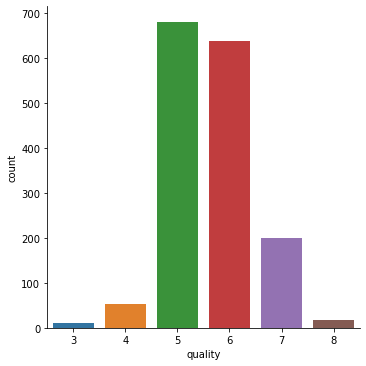

In [9]:
# NUMBER OF VALUES FOR EACH QUALITY
sns.catplot(x='quality',data=df,kind='count')

In [10]:
df.shape

(1599, 12)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

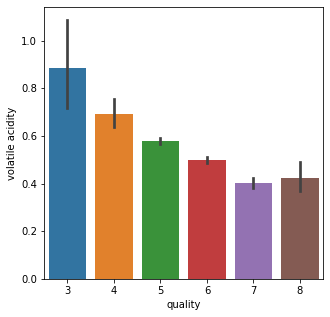

In [11]:
# VOLATILE ACCIDITY VS QUALITY
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',data=df,y='volatile acidity')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

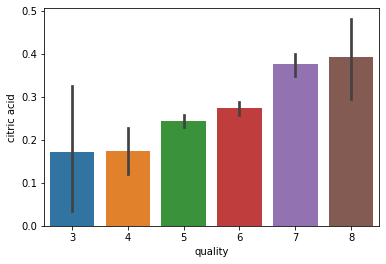

In [12]:
sns.barplot(x='quality',data=df,y='citric acid')
 

<AxesSubplot:>

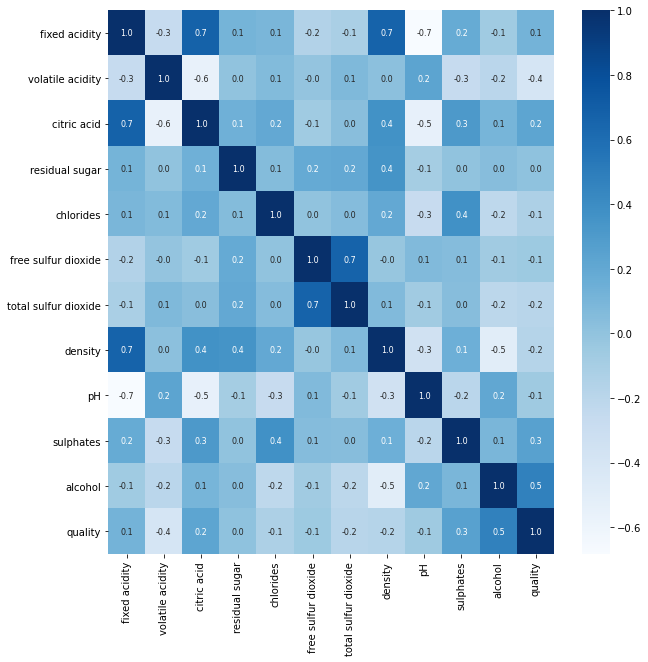

In [13]:
# FIND CORRELATION by MAKING A HEAT MAP
correlation=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [14]:
# DATA PREPROCESSING
#   SEPARATE THE DATA AND LABEL
X=df.drop('quality',axis=1)


In [16]:
# LABEL BINARIZATION
Y=df['quality'].apply(lambda x: 1 if x>=7 else 0)
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [17]:
# SPLITTING THE DATA
XTrain, XTest, YTrain, YTest= train_test_split(X, Y, test_size=0.2, random_state=3)


In [27]:
YTrain.shape

(1279,)

In [18]:
# MODEL TRAINING 
# RANDOM FOREST CLASSIFIER
model=RandomForestClassifier()

In [19]:
model.fit(XTrain, YTrain)


RandomForestClassifier()

In [20]:
# EVALUATION
#  accuracy score of TRAINING DATA
XTrainPred=model.predict(XTrain)
trainDataAcc=accuracy_score(XTrainPred, YTrain)

In [21]:
trainDataAcc

1.0

In [22]:
# ACCURACY SCORE ON TEST DATASET
XTestPred=model.predict(XTest)
testDataAcc=accuracy_score(XTestPred,YTest)

In [23]:
testDataAcc

0.93125

In [26]:
# BUILDING A PREDICTIVE SYSTEM
inputData=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)
inputNP=np.array(inputData)
# RESHAPE THE DATA
inputReshape=inputNP.reshape(1,-1)
prediction=model.predict(inputReshape)
prediction

array([1], dtype=int64)